## Initial Score Validator

### Objective

* Validate scores using predicted data from score model and actual score data

### Rationale

*  Why This?  Validation is the keystone activity for the first phase of this project.

*  Why Me?  As the model architect, I am the logical choice

*  Why Now?  The models are ready and the archived forecast data is available.

### Requirements

*  Pandas 0.24.2
*  Matplotlib 3.1.0


### Input / Output

*  The notebook is expecteed to be in `models/notebooks/validate`
*  Input model prediction file will be a .csv in `models/score_model_data` named `predicted_scores_0_2019-08-04.csv'
*  Input score file will be a .csv in `models/score_model_data` named `actual_scores_0_2019-08-04.csv`
*  Output will be a csv file in `models/score_model_data` named `validation_0_2019-08-04.csv`

### Import / Set-Up

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Inport files
predicted_df = pd.read_csv('../../score_model_data/predicted_scores_0_2019-08-04.csv')
actual_df = pd.read_csv('../../score_model_data/actual_scores_0_2019-08-04.csv')

In [3]:
predicted_df.head()

,Unnamed: 0,est_score,est_std,player
0,0,68.111111,4.284987,Ben Horst
1,1,54.607143,3.745014,Bob Montes
2,2,51.000000,1.809068,Dennis Warsen
3,3,63.655172,3.243409,Gonzalo Arestizabal
4,4,63.500000,7.778175,Greg Mann


In [4]:
actual_df.head()

,Player:,Actual Score(8/4/19):,Predicted Score:,Difference:
0,Ernie Rogers,54,66.00,NaN
1,Marquis Oliver,49,50.25,NaN
2,Mike Hudson,61,NaN,NaN
3,Dmitri Kononov,67,NaN,NaN
4,Harper Alexander,49,NaN,NaN


In [5]:
# Replace Predicted by merging
actual_df = actual_df.drop(columns = ['Predicted Score:','Difference:'])

In [6]:
merged_df = actual_df.merge(predicted_df,left_on = 'Player: ', right_on = 'player', how = 'left')
merged_df.head()

,Player:,Actual Score(8/4/19):,Unnamed: 0,est_score,est_std,player
0,Ernie Rogers,54,439.0,66.000000,5.343016,Ernie Rogers
1,Marquis Oliver,49,226.0,50.250000,4.054319,Marquis Oliver
2,Mike Hudson,61,233.0,58.384615,3.690705,Mike Hudson
3,Dmitri Kononov,67,270.0,64.000000,1.414214,Dmitri Kononov
4,Harper Alexander,49,303.0,52.562500,3.101789,Harper Alexander


In [7]:
merged_df.isna().sum()

Player:                  0
Actual Score(8/4/19):    0
Unnamed: 0               3
est_score                3
est_std                  3
player                   3
dtype: int64

In [8]:
len(merged_df)

46

In [9]:
merged_df['difference'] = merged_df['Actual Score(8/4/19):'] - merged_df['est_score']
merged_df['abs_diff'] = merged_df['difference'].apply(abs)
merged_df['z'] = merged_df['difference'] / merged_df['est_std']
merged_df.head()

,Player:,Actual Score(8/4/19):,Unnamed: 0,est_score,est_std,player,difference,abs_diff,z
0,Ernie Rogers,54,439.0,66.000000,5.343016,Ernie Rogers,-12.000000,12.000000,-2.245922
1,Marquis Oliver,49,226.0,50.250000,4.054319,Marquis Oliver,-1.250000,1.250000,-0.308313
2,Mike Hudson,61,233.0,58.384615,3.690705,Mike Hudson,2.615385,2.615385,0.708641
3,Dmitri Kononov,67,270.0,64.000000,1.414214,Dmitri Kononov,3.000000,3.000000,2.121320
4,Harper Alexander,49,303.0,52.562500,3.101789,Harper Alexander,-3.562500,3.562500,-1.148531


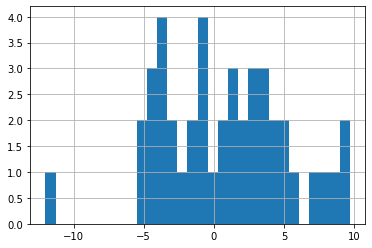

In [10]:
merged_df['difference'].hist(bins=30)

In [11]:
merged_df

,Player:,Actual Score(8/4/19):,Unnamed: 0,est_score,est_std,player,difference,abs_diff,z
0,Ernie Rogers,54,439.0,66.000000,5.343016,Ernie Rogers,-12.000000,12.000000,-2.245922
1,Marquis Oliver,49,226.0,50.250000,4.054319,Marquis Oliver,-1.250000,1.250000,-0.308313
2,Mike Hudson,61,233.0,58.384615,3.690705,Mike Hudson,2.615385,2.615385,0.708641
3,Dmitri Kononov,67,270.0,64.000000,1.414214,Dmitri Kononov,3.000000,3.000000,2.121320
4,Harper Alexander,49,303.0,52.562500,3.101789,Harper Alexander,-3.562500,3.562500,-1.148531
5,Wolf Gaudchau,56,333.0,54.500000,1.054145,Wolf Gaudchau,1.500000,1.500000,1.422954
6,Alan Chambless,58,184.0,62.750000,3.112475,Alan Chambless,-4.750000,4.750000,-1.526117
7,Daniel Dodell,69,202.0,59.333333,3.965126,Daniel Dodell,9.666667,9.666667,2.437922
8,Daniel Humphreys,58,203.0,56.777778,4.825345,Daniel Humphreys,1.222222,1.222222,0.253292
9,Daniel Tarango,68,354.0,62.600000,1.697056,Daniel Tarango,5.400000,5.400000,3.181981


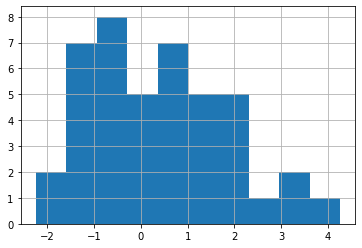

In [12]:
merged_df['z'].hist()

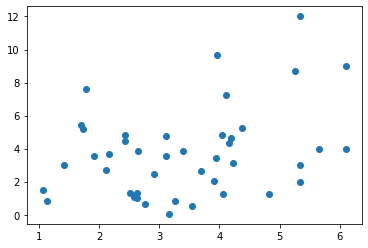

In [13]:
plt.scatter(x=merged_df['est_std'], y=merged_df['abs_diff'])

In [14]:
merged_df['z'].std()

1.4685198449694064

In [23]:
merged_df['z'].mean()

0.3746704149824198

In [24]:
merged_df['abs_diff'].mean()

3.7287846957345563

In [19]:
merged_dropna_df = merged_df.dropna()
merged_dropna_df['predicted score'] = merged_dropna_df['est_score'].astype('int')
merged_dropna_df.head()

C:\Users\andre\Anaconda3\envs\discgolf\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Player:,Actual Score(8/4/19):,Unnamed: 0,est_score,est_std,player,difference,abs_diff,z,predicted score
0,Ernie Rogers,54,439.0,66.000000,5.343016,Ernie Rogers,-12.000000,12.000000,-2.245922,66
1,Marquis Oliver,49,226.0,50.250000,4.054319,Marquis Oliver,-1.250000,1.250000,-0.308313,50
2,Mike Hudson,61,233.0,58.384615,3.690705,Mike Hudson,2.615385,2.615385,0.708641,58
3,Dmitri Kononov,67,270.0,64.000000,1.414214,Dmitri Kononov,3.000000,3.000000,2.121320,64
4,Harper Alexander,49,303.0,52.562500,3.101789,Harper Alexander,-3.562500,3.562500,-1.148531,52


In [22]:
output_df = merged_dropna_df[['Player: ','Actual Score(8/4/19):','predicted score','difference']]
output_df['difference'] = output_df['difference'].astype('int')
output_df.to_csv('validation_0_2019-08-04.csv')
output_df.head()

C:\Users\andre\Anaconda3\envs\discgolf\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Player:,Actual Score(8/4/19):,predicted score,difference
0,Ernie Rogers,54,66,-12
1,Marquis Oliver,49,50,-1
2,Mike Hudson,61,58,2
3,Dmitri Kononov,67,64,3
4,Harper Alexander,49,52,-3


In [25]:
merged_df['abs_diff'].mean()

3.7287846957345563

In [26]:
merged_df['difference'].mean()

0.7102773995596643